In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Parameters Vector

Load, merge, normalization vector of parameters.

In [2]:
# Loading each csv file
df1 = pd.read_csv('fh.csv')
df2 = pd.read_csv('fp.csv')

Concatenating all four DataFrames into one.

In [3]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Status
0,-293.430239,101.862316,13.292425,-34.615979,-13.981128,15.430809,14.811644,11.609699,-22.399024,31.506209,-1.819383,-18.840853,-19.637120,0.100478,healthy
1,-163.370591,98.608829,-54.268960,-7.933267,-41.739898,-7.358411,0.884989,-18.851250,-1.047138,12.280790,-8.302698,2.119553,-29.580379,0.265551,healthy
2,-241.858335,139.226006,-40.755116,-14.336575,-9.495435,-4.305301,11.620185,2.562133,-9.844266,13.291225,-14.520573,-15.669385,-15.376516,0.156921,healthy
3,-211.005611,126.482252,-18.056063,-31.040735,-4.248392,-7.870706,15.085091,11.018850,-27.695277,17.300901,-13.630705,12.299038,-23.338855,0.098562,healthy
4,-240.771690,141.427767,11.414391,-22.297131,-34.254011,-4.837738,6.969184,13.073304,-4.206142,-6.538549,-4.646556,7.990044,-15.844321,0.145529,healthy


Features has diffrent rows, so they have to be normalized.

In [4]:
features = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Status
0,-2.036470,-1.242756,1.786777,-0.782825,0.794943,1.270303,0.431466,0.775210,-0.769972,2.442527,0.246110,-1.394025,-0.450223,-1.265943,healthy
1,1.279457,-1.385242,-1.091465,1.179583,-0.984879,-0.504027,-0.621942,-1.689870,1.243669,0.705470,-0.399379,0.524766,-1.424640,1.793630,healthy
2,-0.721622,0.393578,-0.515750,0.708645,1.082555,-0.266317,0.190065,0.043028,0.414035,0.796765,-1.018439,-1.103697,-0.032693,-0.219798,healthy
3,0.064981,-0.164532,0.451273,-0.519880,1.418982,-0.543913,0.452150,0.727395,-1.269448,1.159047,-0.929843,1.456632,-0.812985,-1.301455,healthy
4,-0.693918,0.490003,1.706769,0.123178,-0.504903,-0.307772,-0.161735,0.893654,0.945752,-0.994897,-0.035368,1.062172,-0.078537,-0.430943,healthy


/home/barti/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


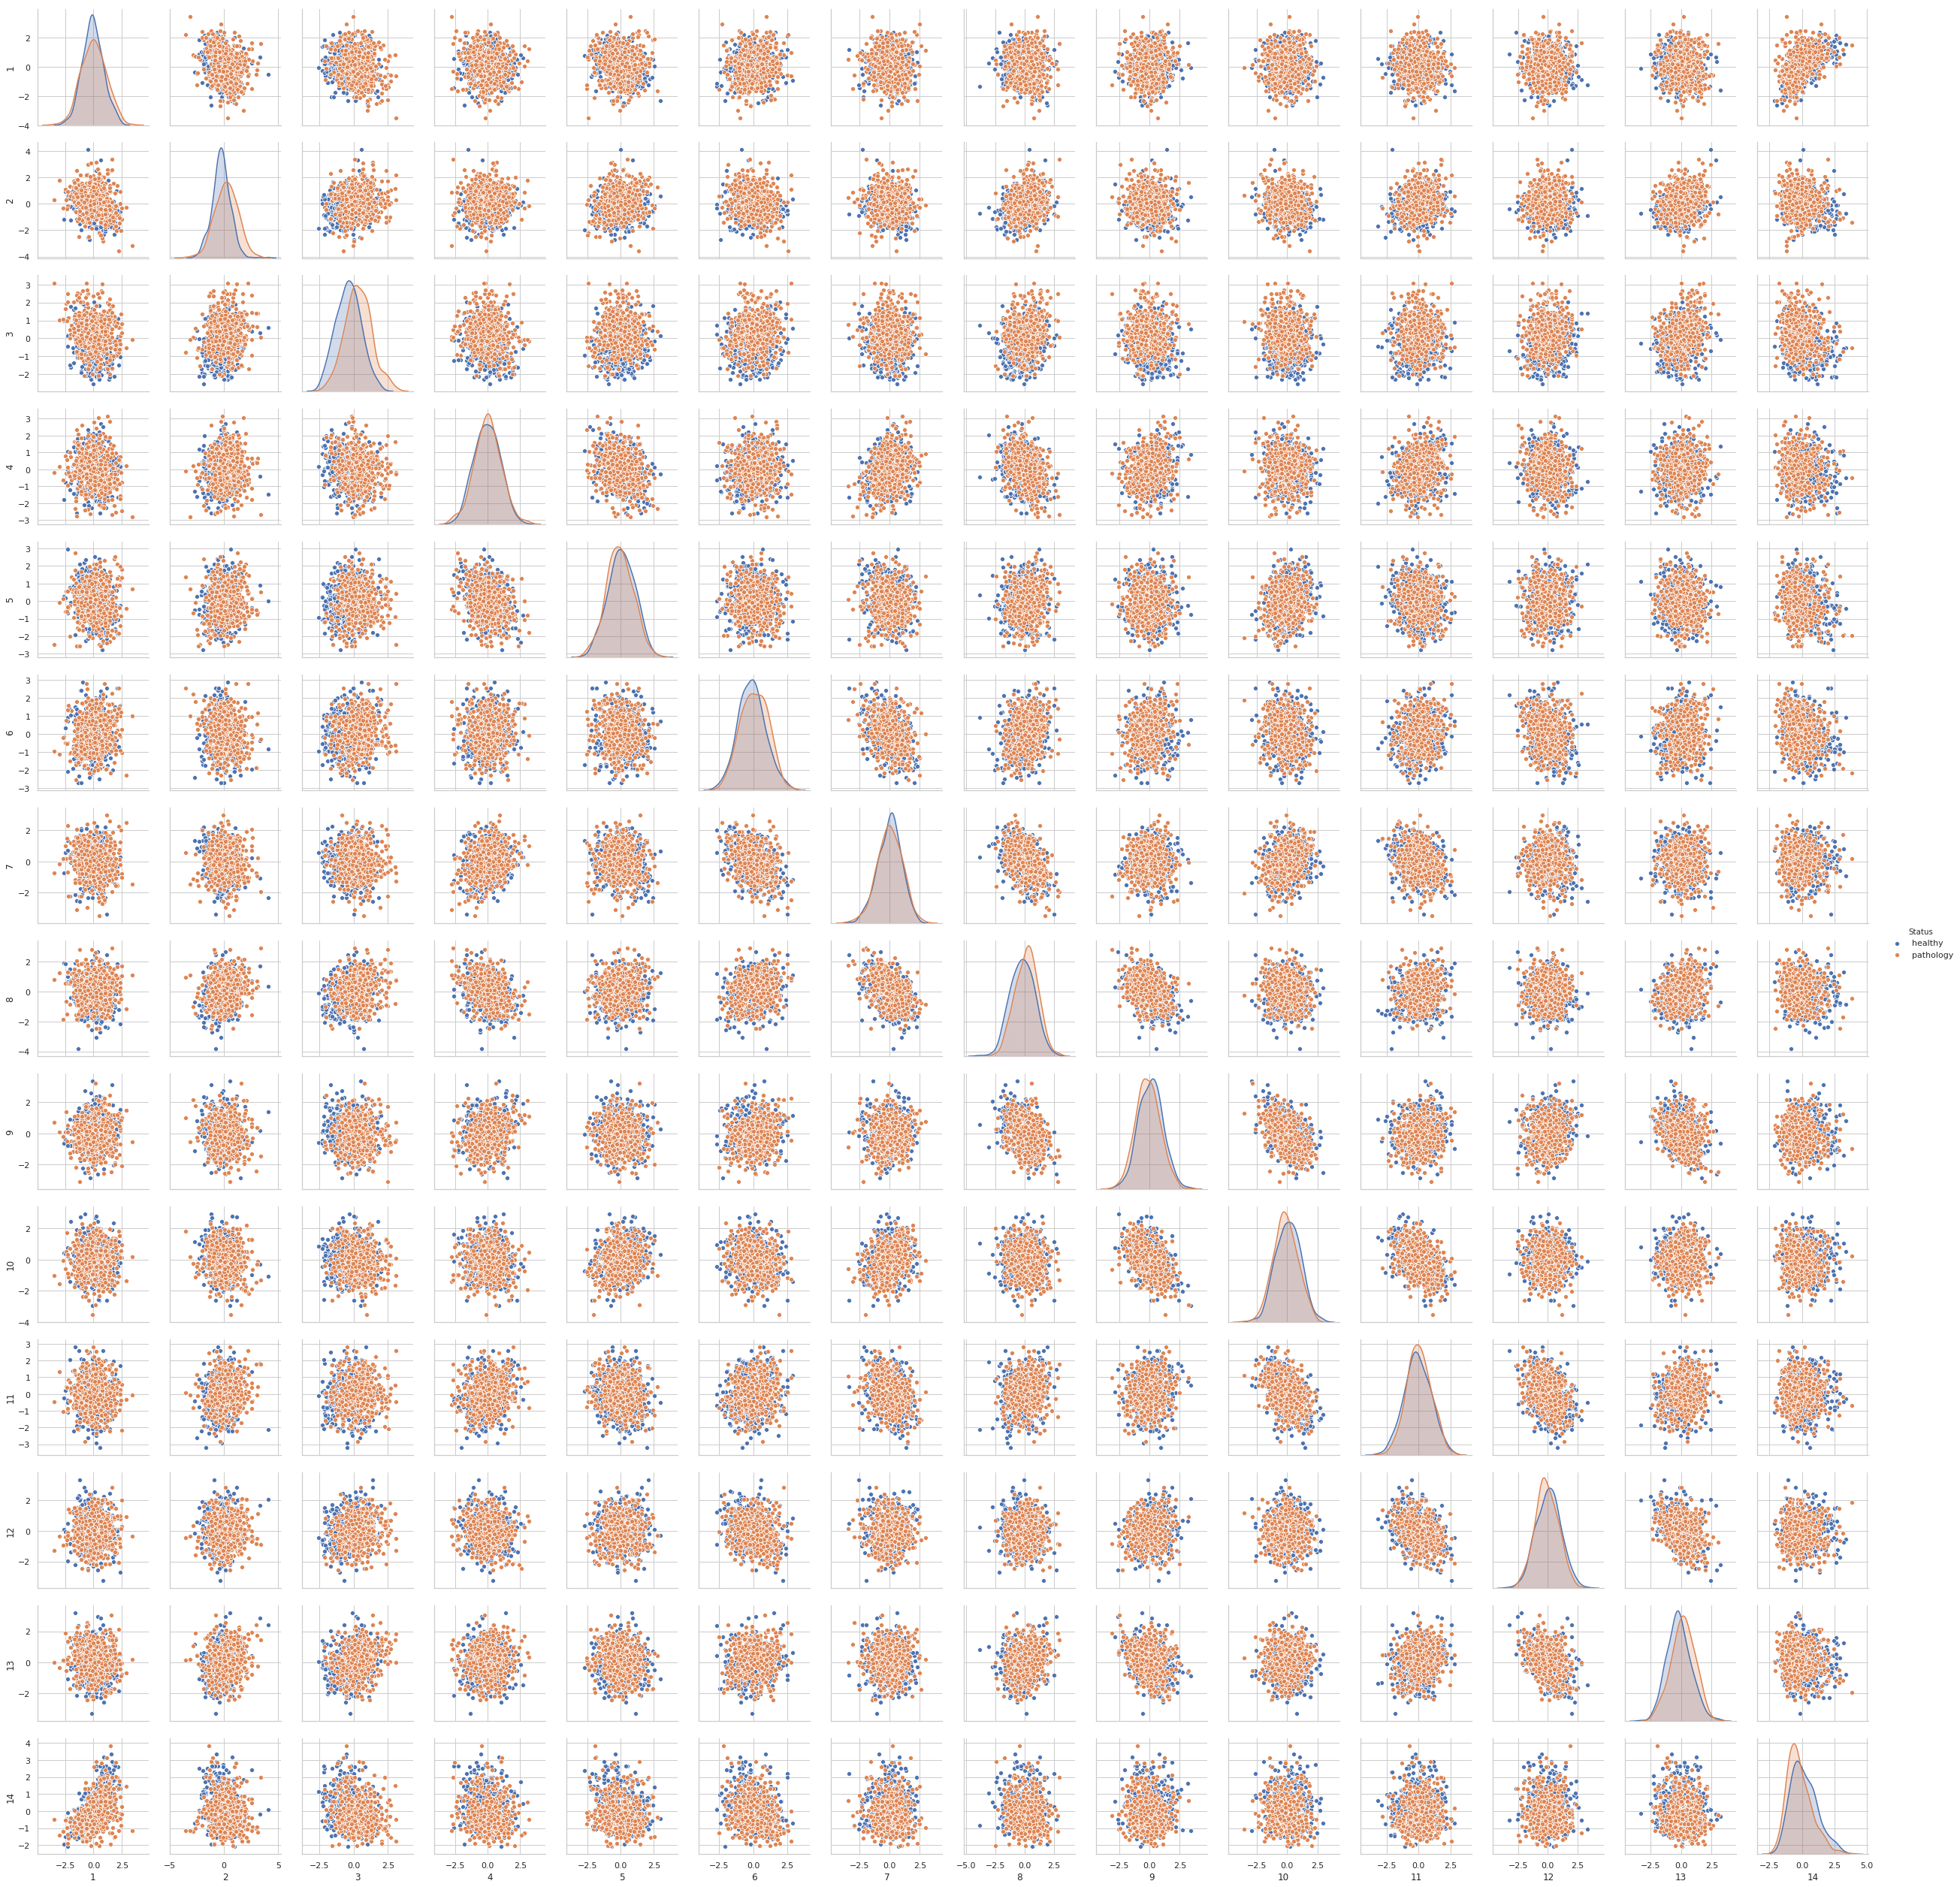

In [5]:
sns.pairplot(allpatients, hue='Status')

Text(0,0.5,'Energia')

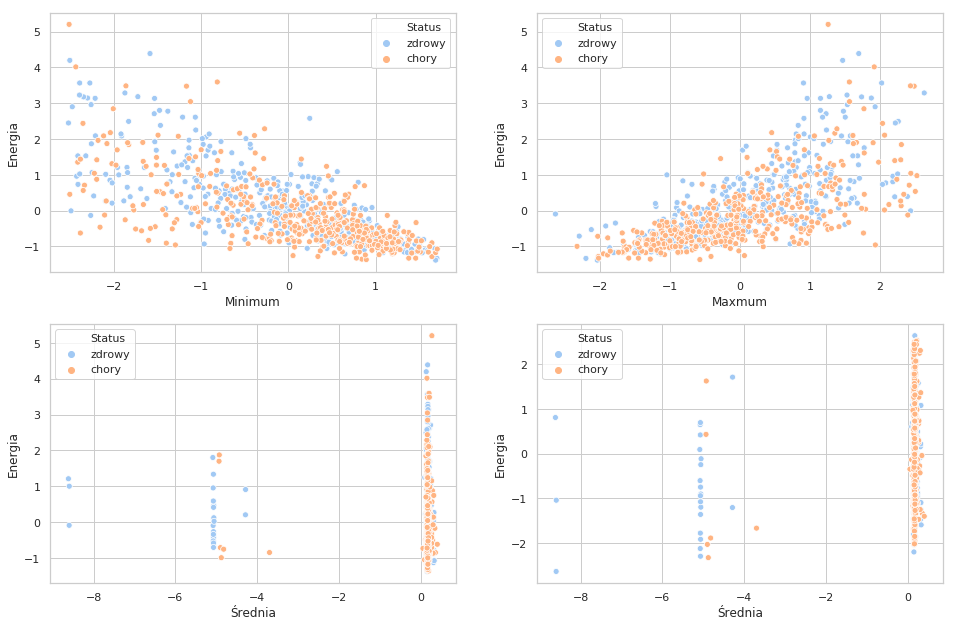

In [67]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
plt.subplot(2,2,1)
sns.scatterplot(x=allpatients['MIN'],y=allpatients['ENERGY'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Minimum')
plt.ylabel('Energia')
plt.subplot(2,2,2)
sns.scatterplot(x=allpatients['MAX'],y=allpatients['ENERGY'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Maksimum')
plt.ylabel('Energia')
plt.subplot(2,2,3)
sns.scatterplot(x=allpatients['MEAN'],y=allpatients['ENERGY'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Średnia')
plt.ylabel('Energia')
plt.subplot(2,2,4)
sns.scatterplot(x=allpatients['MEAN'],y=allpatients['MAX'],hue=allpatients['Status'],palette='pastel')
plt.xlabel('Średnia')
plt.ylabel('Maksimum')

Afterwards data have to be suffled, in order to avoid overfitting

In [6]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Status
0,-0.328510,0.993408,0.231154,-0.781779,1.571356,0.215624,0.567008,-0.017811,0.626022,0.727352,-1.198725,1.452875,-0.631079,1.088885,healthy
1,0.077115,0.645261,1.232714,-0.126203,-1.156827,-0.654557,1.454471,0.622701,-0.850587,-0.062016,-0.733788,0.232395,0.822426,0.996024,pathology
2,-1.513537,2.524405,2.391988,0.662807,0.162373,-0.059284,2.076217,-0.395655,0.613850,1.283114,-0.474174,-0.669596,1.925120,-1.167428,pathology
3,-1.109505,-0.302767,0.213720,0.206550,0.019836,-2.698306,2.017084,-1.854304,-0.171021,0.954957,-0.694459,1.238376,0.434504,0.081284,healthy
4,-0.877611,0.394440,-0.771656,-0.267109,1.813036,-1.214964,0.400550,1.048657,-0.787920,0.549848,-1.333919,0.278988,-1.071395,0.194186,healthy


Exploratory Data Analysis, quick look at value of each parameters.

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [7]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [8]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [56]:
allpatients['Pathology'] = status
allpatients.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Pathology
0,-0.328510,0.993408,0.231154,-0.781779,1.571356,0.215624,0.567008,-0.017811,0.626022,0.727352,-1.198725,1.452875,-0.631079,1.088885,0
1,0.077115,0.645261,1.232714,-0.126203,-1.156827,-0.654557,1.454471,0.622701,-0.850587,-0.062016,-0.733788,0.232395,0.822426,0.996024,1
2,-1.513537,2.524405,2.391988,0.662807,0.162373,-0.059284,2.076217,-0.395655,0.613850,1.283114,-0.474174,-0.669596,1.925120,-1.167428,1
3,-1.109505,-0.302767,0.213720,0.206550,0.019836,-2.698306,2.017084,-1.854304,-0.171021,0.954957,-0.694459,1.238376,0.434504,0.081284,0
4,-0.877611,0.394440,-0.771656,-0.267109,1.813036,-1.214964,0.400550,1.048657,-0.787920,0.549848,-1.333919,0.278988,-1.071395,0.194186,0


# Detection alghoritm

Building logistic regression algorithm

# PCA

In [51]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=13)
pca.fit(allpatients.drop(['Pathology'], axis=1))
X = pca.transform(allpatients.drop(['Pathology'], axis=1))

# Train test split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    allpatients['Pathology'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logModel = LogisticRegression(max_iter=100, C = 1)
logModel.fit(X_train, y_train)

/home/barti/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        86
           1       0.75      0.69      0.72        86

   micro avg       0.73      0.73      0.73       172
   macro avg       0.73      0.73      0.73       172
weighted avg       0.73      0.73      0.73       172



In [82]:
print(confusion_matrix(y_test,prediction))

[[57 29]
 [28 58]]
